In [13]:
import sys
sys.path.insert(0, '../')

import vqe as vqe
import visualization as qplt
from matplotlib import pyplot as plt
import losses as losses
import qcnn as qcnn
import numpy as np
##############

In [14]:
Ns = range(4,13)
side = 100

path = '../data/vqes/ANNNI/'
train_index = np.arange(0,2*side-1)

In [3]:
vqes = []
for N in Ns:
    try:
        filename = 'N'+str(N)+'n'+str(side)
        vqes.append(vqe.load_vqe(path + filename) )
        print('{0} loaded sucessfully'.format(path+filename))
    except:
        print('{0} not found'.format(path+filename))

../data/vqes/ANNNI/N4n100 loaded sucessfully
../data/vqes/ANNNI/N5n100 not found
../data/vqes/ANNNI/N6n100 loaded sucessfully
../data/vqes/ANNNI/N7n100 not found
../data/vqes/ANNNI/N8n100 loaded sucessfully
../data/vqes/ANNNI/N9n100 not found
../data/vqes/ANNNI/N10n100 loaded sucessfully
../data/vqes/ANNNI/N11n100 not found
../data/vqes/ANNNI/N12n100 loaded sucessfully


4


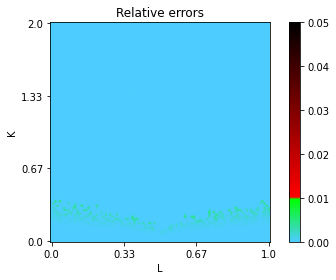

Cost: 0.15484681725502014: 100%|██████████████| 500/500 [00:05<00:00, 85.62it/s]


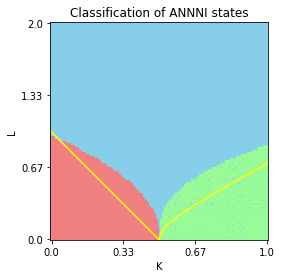

6


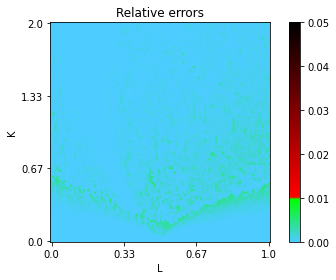

Cost: 0.13492217659950256: 100%|██████████████| 500/500 [00:11<00:00, 45.43it/s]


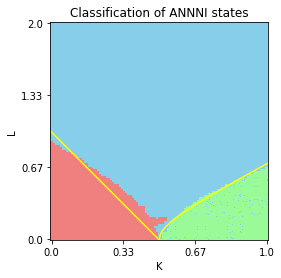

8


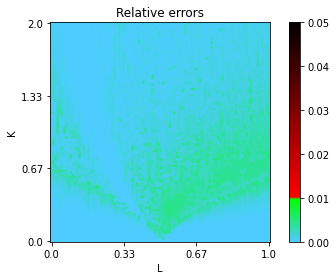

Cost: 0.08908218890428543: 100%|██████████████| 500/500 [00:22<00:00, 22.69it/s]


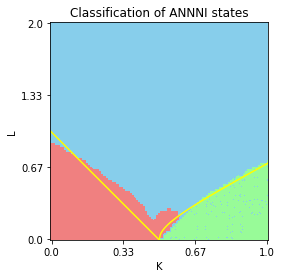

10


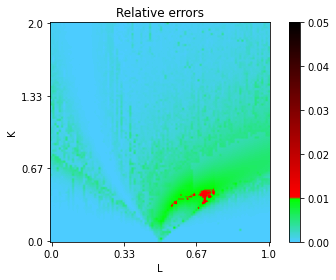

Cost: 0.06314843893051147: 100%|██████████████| 500/500 [00:32<00:00, 15.61it/s]


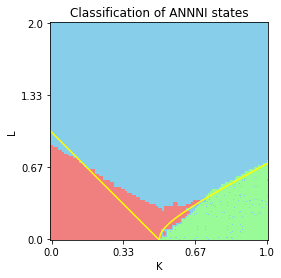

12


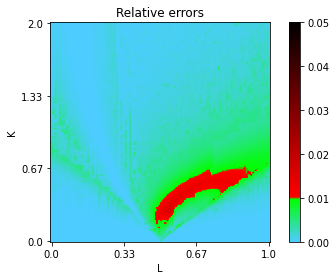

Cost: 0.06446286290884018: 100%|██████████████| 500/500 [01:26<00:00,  5.75it/s]


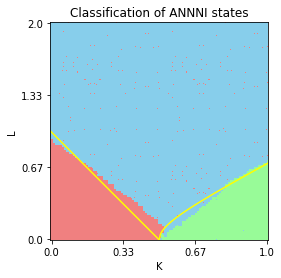

In [16]:
for vqeclass in vqes:
    print(vqeclass.N)
    qplt.show_VQE_annni(vqeclass, plot3d=False)
    plt.show()
    qcnnclass = qcnn.qcnn(vqeclass, qcnn.qcnn_circuit, n_outputs = 2)
    qcnnclass.train(.2, 500, train_index, losses.cross_entropy)
    qplt.show_QCNN_classificationANNNI(qcnnclass, hard_thr = True)